## Problem Statement

Identification risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 

### Business Objectives

The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default, to utilise this knowledge for its portfolio and risk assessment. 


<b>Environment: Pyhton 3 <br>
Authors: Arun Kumar Narayanan <br>
Project Name: Exploratory Data Analysis on Loan data </b>

In [776]:
#Required python libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading The Dataset.

In [1]:
#Navigate to project folder path.

##project_path = '#give your data directory path'

#os.getcwd()

#os.chdir(project_path)

In [778]:
#Loading data to loan_data dataframe. 

loan_data = pd.read_csv('.\\data\\loan.csv',low_memory=False)

In [779]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [780]:
#list of columns in the dataset

list (loan_data)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [781]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning 

#### (1) Handling missing values

In [782]:
#Total columns in loan_data 
Total_cols = len(list(loan_data))
print ("Total Number of Columns ",Total_cols )

Total Number of Columns  111


#### Removing columns with missing values greater than or equal to 70%

In [783]:
#These columns are not significant in data analysis.

loan_data = loan_data.drop(loan_data.loc[:,list((100*(loan_data.isnull().sum()/len(loan_data.index))>=70))].columns, 1)

In [784]:
#Total number of columns after removing null value columns 

print ('Total Number of Columns Removed :', Total_cols - len(list(loan_data)))

Total Number of Columns Removed : 56


In [785]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Removing columns with same value throughout 

In [786]:
#Removing columns with same value throughout since this will not give any significance 

loan_data = loan_data.drop(loan_data.std()[(loan_data.std() == 0)].index, axis=1)

In [787]:
print ('Total Number of Columns',len(list(loan_data)))

Total Number of Columns 49


In [788]:
#Find columns that have high volume of na values (top 10 columns values printed)

(loan_data.isna().mean().round(4)*100).sort_values(ascending = False).head(10)

mths_since_last_delinq    64.66
desc                      32.58
emp_title                  6.19
emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
last_credit_pull_d         0.01
loan_amnt                  0.00
dtype: float64

<b>`mths_since_last_delinq` column has no much significant effect on `loan_status` hence removing that column</b>

In [789]:
loan_data = loan_data.drop(loan_data.loc[:,list((100*(loan_data.isnull().sum()/len(loan_data.index))>=60))].columns, 1)

#### Finding percentage of zeros in each column and distribution of data column

In [790]:
# Printing non zero percentages in ascending order. (ie top 10 columns with highest zero percentages)

(loan_data.astype(bool).sum(axis=0)*100/len(loan_data)).sort_values().head(10)

out_prncp                   2.870307
out_prncp_inv               2.870307
total_rec_late_fee          5.151446
pub_rec                     5.327693
pub_rec_bankruptcies        5.987361
collection_recovery_fee     9.522371
recoveries                 10.620137
delinq_2yrs                10.856812
inq_last_6mths             51.406199
revol_bal                  97.497293
dtype: float64

`total_rec_late_fee` this column with zero values have no relevance in data analysis, <br> but zero in other columns are relevant.

So removing the `total_rec_late_fee` column.


In [791]:
del loan_data['total_rec_late_fee']

In [792]:
print ('Total columns remaining for analysis : ' , len(list(loan_data)))

Total columns remaining for analysis :  47


#### (2) Checking Loan Status across data set

In [793]:
#Distribution of defaulters and non-defaulters in load_data

loan_data.groupby('loan_status').count()/len(loan_data)*100

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,14.167737,14.167737,14.167737,14.167737,14.167737,14.167737,14.167737,14.167737,14.167737,14.167737,...,14.167737,14.167737,14.167737,14.167737,14.167737,13.988972,14.167737,14.165219,14.167737,13.870635
Current,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,...,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307,2.870307
Fully Paid,82.961956,82.961956,82.961956,82.961956,82.961956,82.961956,82.961956,82.961956,82.961956,82.961956,...,82.961956,82.961956,82.961956,82.961956,82.961956,82.961956,82.961956,82.959438,82.961956,81.504142


#### (1) Creating Separate DataFrame of ChargedOFF Customers for further Analysis.

In [794]:
#Defaulters data set

loan_data_default = loan_data[loan_data.loan_status == 'Charged Off']

In [795]:
loan_data_default.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,117.08,1.1100,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,189.06,2.0900,Apr-12,152.39,Aug-12,INDIVIDUAL,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,269.29,2.5200,Nov-12,121.45,Mar-13,INDIVIDUAL,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,2270.70,1256.14,570.26,444.30,4.1600,Jul-12,305.38,Nov-12,INDIVIDUAL,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,7471.99,5433.47,1393.42,645.10,6.3145,Oct-13,325.74,Mar-14,INDIVIDUAL,0.0


In [796]:
loan_data_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 47 columns):
id                         5627 non-null int64
member_id                  5627 non-null int64
loan_amnt                  5627 non-null int64
funded_amnt                5627 non-null int64
funded_amnt_inv            5627 non-null float64
term                       5627 non-null object
int_rate                   5627 non-null object
installment                5627 non-null float64
grade                      5627 non-null object
sub_grade                  5627 non-null object
emp_title                  5143 non-null object
emp_length                 5399 non-null object
home_ownership             5627 non-null object
annual_inc                 5627 non-null float64
verification_status        5627 non-null object
issue_d                    5627 non-null object
loan_status                5627 non-null object
pymnt_plan                 5627 non-null object
url                        56

#### Calculating the credit loss

<b>Credit Loss is Business Derived Metrics to analysis the effect of other loan parameters </b> 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Maximum loss - 35000.0
Minimum loss -  25.0
Total loss -  43813065.0


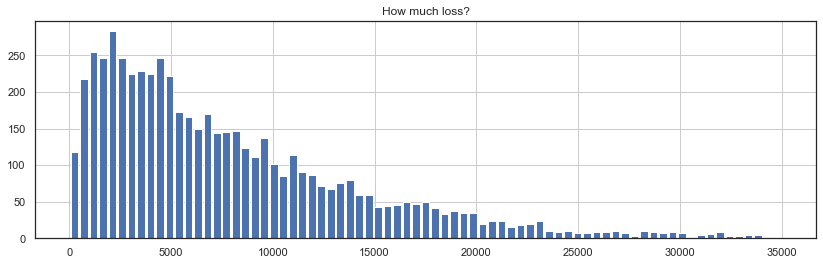

In [797]:

loan_data_default['credit_lose']= loan_data_default.funded_amnt - loan_data_default.total_rec_prncp

#maximum lost amount 
print('Maximum loss -' , round(loan_data_default['credit_lose'].max()))
#minimum lost amount 
print('Minimum loss - ',round(loan_data_default['credit_lose'].min()))
#Total loss
print('Total loss - ',round(loan_data_default['credit_lose'].sum()))

loan_data_default.credit_lose.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How much loss?')
plt.show()

## Numerical and Categorical Features

In [897]:

# Finding numerical features
numeric_data = loan_data_default.select_dtypes(include = [np.number])
num_cols = loan_data_default._get_numeric_data().columns

print (num_cols)
print ('Total number of Numeric columns:',len(list(numeric_data)))


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'credit_lose'],
      dtype='object')
Total number of Numeric columns: 25


In [898]:
numeric_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,credit_lose
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,...,0.0,1008.71,1008.71,456.46,435.17,117.08,1.1100,119.66,0.0,2043.54
8,1071795,1306957,5600,5600,5600.0,152.39,40000.0,5.55,0,2,...,0.0,646.02,646.02,162.02,294.94,189.06,2.0900,152.39,0.0,5437.98
9,1071570,1306721,5375,5375,5350.0,121.45,15000.0,18.08,0,0,...,0.0,1476.19,1469.34,673.48,533.42,269.29,2.5200,121.45,0.0,4701.52
12,1064687,1298717,9000,9000,9000.0,305.38,30000.0,10.08,0,1,...,0.0,2270.70,2270.70,1256.14,570.26,444.30,4.1600,305.38,0.0,7743.86
14,1069057,1303503,10000,10000,10000.0,325.74,100000.0,7.06,0,2,...,0.0,7471.99,7471.99,5433.47,1393.42,645.10,6.3145,325.74,0.0,4566.53


In [967]:

# Finding categorical features
categorical_data = loan_data_default.select_dtypes(exclude = [np.number])

print ('Total number of Numeric columns:',len(list(categorical_data)))

Total number of Numeric columns: 23


In [900]:
categorical_data.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
8,60 months,21.28%,F,F2,NaN,4 years,OWN,Source Verified,Dec-11,Charged Off,...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,Apr-04,32.60%,f,Apr-12,Aug-12,INDIVIDUAL
9,60 months,12.69%,B,B5,Starbucks,< 1 year,RENT,Verified,Dec-11,Charged Off,...,other,Building my credit history.,774xx,TX,Sep-04,36.50%,f,Nov-12,Mar-13,INDIVIDUAL
12,36 months,13.49%,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,debt_consolidation,freedom,245xx,VA,Apr-04,91.70%,f,Jul-12,Nov-12,INDIVIDUAL
14,36 months,10.65%,B,B2,SFMTA,3 years,RENT,Source Verified,Dec-11,Charged Off,...,other,Other Loan,951xx,CA,May-91,55.50%,f,Oct-13,Mar-14,INDIVIDUAL


### Analysis on Numerical Features

#### Distribution of Numerical Variables 

In [901]:
#Selecting only on index columns

list(numeric_data)


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies',
 'credit_lose']

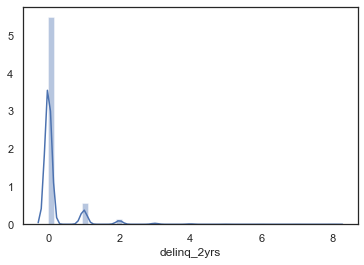

In [902]:
sns.distplot(numeric_data['delinq_2yrs'])

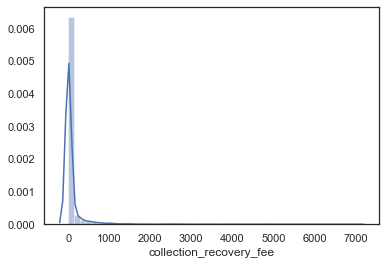

In [903]:
sns.distplot(numeric_data['collection_recovery_fee'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


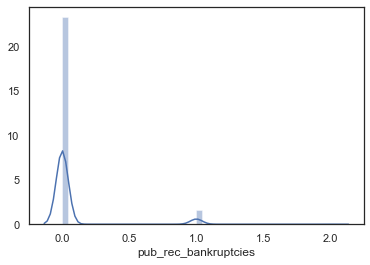

In [904]:
numeric_data['pub_rec_bankruptcies'].dropna(inplace  = True)
sns.distplot(numeric_data['pub_rec_bankruptcies'])

The above columns have data distribution concentrated to zero in large percentage, thus these columns will not have a great impact in analysis, thus deleting those columns

### Removing the columns with zero vaue through out.

In [905]:
(numeric_data.out_prncp_inv!= 0).sum()

0

In [906]:
(numeric_data.out_prncp != 0).sum()

0

In [907]:
numeric_data.drop(['out_prncp_inv','out_prncp'],axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [908]:
numeric_data.drop(['pub_rec_bankruptcies','delinq_2yrs','collection_recovery_fee','pub_rec_bankruptcies'],axis = 1, inplace = True)

In [909]:
print ('Number of columns: ', numeric_data.shape[1])

Number of columns:  20


In [910]:
numeric_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt,credit_lose
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,5,3,0,1687,4,1008.71,1008.71,456.46,435.17,117.08,119.66,2043.54
8,1071795,1306957,5600,5600,5600.0,152.39,40000.0,5.55,2,11,0,5210,13,646.02,646.02,162.02,294.94,189.06,152.39,5437.98
9,1071570,1306721,5375,5375,5350.0,121.45,15000.0,18.08,0,2,0,9279,3,1476.19,1469.34,673.48,533.42,269.29,121.45,4701.52
12,1064687,1298717,9000,9000,9000.0,305.38,30000.0,10.08,1,4,0,10452,9,2270.70,2270.70,1256.14,570.26,444.30,305.38,7743.86
14,1069057,1303503,10000,10000,10000.0,325.74,100000.0,7.06,2,14,0,11997,29,7471.99,7471.99,5433.47,1393.42,645.10,325.74,4566.53


### Correlation Between Numerical featuers and Loan Attributes

In [911]:
#Removing the index columns like id and member_id before ploting correlation 


numeric_data.drop(['id','member_id'],axis = 1, inplace = True)

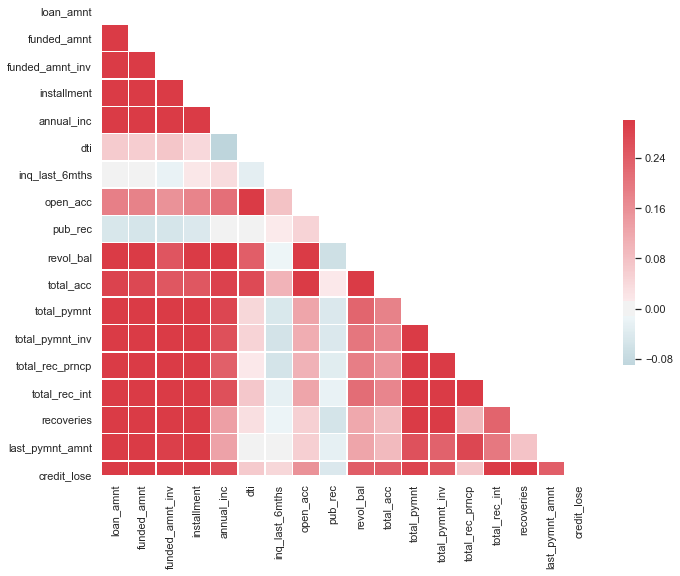

In [912]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = numeric_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [913]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Matrix for Numeric Features")\
    .set_precision(2)\
    .set_table_styles(magnify())

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt,credit_lose
loan_amnt,1,0.98,0.91,0.93,0.35,0.064,0.0075,0.18,-0.048,0.31,0.28,0.68,0.64,0.55,0.7,0.31,0.33,0.85
funded_amnt,0.98,1,0.93,0.95,0.35,0.061,0.0079,0.18,-0.053,0.3,0.28,0.7,0.66,0.57,0.71,0.32,0.34,0.86
funded_amnt_inv,0.91,0.93,1,0.86,0.31,0.073,-0.018,0.15,-0.053,0.25,0.25,0.69,0.73,0.55,0.72,0.3,0.29,0.78
installment,0.93,0.95,0.86,1,0.36,0.042,0.018,0.18,-0.041,0.3,0.25,0.67,0.62,0.58,0.63,0.3,0.35,0.8
annual_inc,0.35,0.35,0.31,0.36,1,-0.09,0.037,0.21,-0.0067,0.38,0.29,0.28,0.26,0.24,0.26,0.13,0.13,0.27
dti,0.064,0.061,0.073,0.042,-0.09,1,-0.029,0.3,0.008,0.24,0.27,0.043,0.049,0.015,0.069,0.031,0.00037,0.065
inq_last_6mths,0.0075,0.0079,-0.018,0.018,0.037,-0.029,1,0.079,0.013,-0.011,0.1,-0.045,-0.057,-0.054,-0.024,-0.014,0.0097,0.043
open_acc,0.18,0.18,0.15,0.18,0.21,0.3,0.079,1,0.05,0.33,0.69,0.12,0.11,0.1,0.12,0.055,0.057,0.16
pub_rec,-0.048,-0.053,-0.053,-0.041,-0.0067,0.008,0.013,0.05,1,-0.064,0.016,-0.042,-0.043,-0.034,-0.019,-0.054,-0.024,-0.043
revol_bal,0.31,0.3,0.25,0.3,0.38,0.24,-0.011,0.33,-0.064,1,0.36,0.23,0.2,0.19,0.22,0.12,0.12,0.24


### Analysis on Charged off Customer Attributes  

Columns showing to customer Attributes or characteristics   

The main numeric features are : `annual_inc`, `dti` , `inq_last_6mths` , `open_acc`, `pub_rec`, `revol_bal`, `total_acc`, `recoveries`

### Loan repayment trend of a Charged OFF customer 

<b>The total payed amount is less when DTI is high, ie customer with high DTI tend to pay back less amount </b>

In [914]:
numeric_data['total_pymnt'].corr(numeric_data['dti'])

0.043359611296065664

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


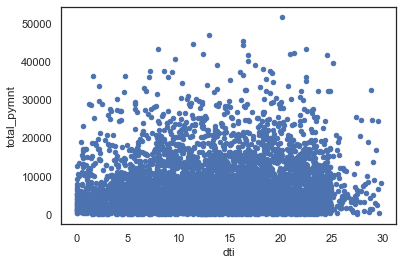

In [915]:
numeric_data.plot(kind='scatter',y='total_pymnt', x='dti')

<b>The total payed amount is less when inquiry on credit score is high, ie customer with high inquiry on credit score tend to pay back less amount ie credit loss will be high. </b>

In [916]:
numeric_data['total_pymnt'].corr(numeric_data['inq_last_6mths'])

-0.04520170408216005

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


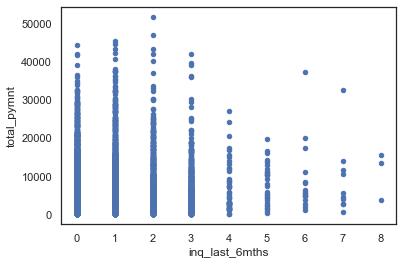

In [917]:
numeric_data.plot(kind='scatter',y='total_pymnt', x='inq_last_6mths')

<b>The total amount payed by customer with high credit line and having high credit line present tend to pay back less amount,ie credit loss will be high.  </b>

In [918]:
numeric_data['total_pymnt'].corr(numeric_data['open_acc'])

0.12453154108919844

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


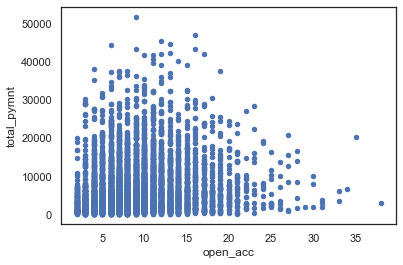

In [919]:
numeric_data.plot(kind='scatter',y='total_pymnt', x='open_acc')

In [920]:
numeric_data['total_pymnt'].corr(numeric_data['total_acc'])

0.18043890575777274

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


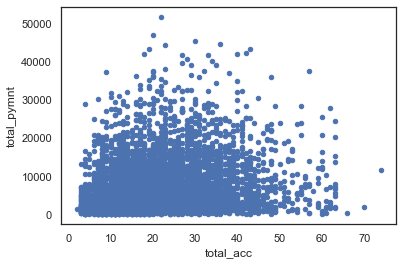

In [921]:
numeric_data.plot(kind='scatter',y='total_pymnt', x='total_acc')

<b>The total amount payed by customer with known derogatory public records tend to payback less amount ie credit loss will be high. </b>

In [922]:
numeric_data['total_pymnt'].corr(numeric_data['pub_rec'])

-0.041790580814540575

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


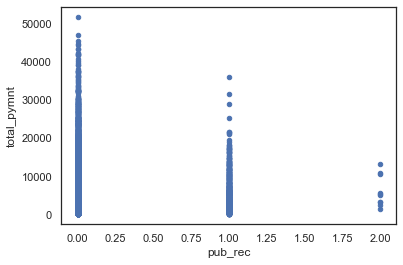

In [923]:
numeric_data.plot(kind='scatter',y='total_pymnt', x='pub_rec')

<b>The total amount payed by customer with high revolving balance  tend to payback less amount ie credit loss will be high. </b>

In [924]:
numeric_data['total_pymnt'].corr(numeric_data['revol_bal'])

0.2274247664617954

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


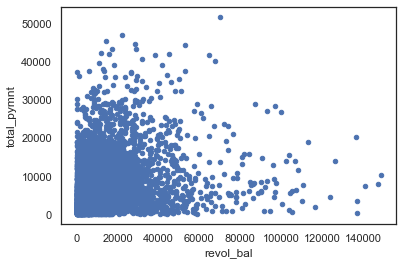

In [925]:
numeric_data.plot(kind='scatter',y='total_pymnt', x='revol_bal')

## Anaylsis on categorical_data for Charged off customer

#### Data cleaning in categorcal features 

In [950]:
categorical_data.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
1,60 months,15.27,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
8,60 months,21.28,F,F2,NaN,4 years,OWN,Source Verified,Dec-11,Charged Off,...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,Apr-04,32.60%,f,Apr-12,Aug-12,INDIVIDUAL
9,60 months,12.69,B,B5,Starbucks,< 1 year,RENT,Verified,Dec-11,Charged Off,...,other,Building my credit history.,774xx,TX,Sep-04,36.50%,f,Nov-12,Mar-13,INDIVIDUAL
12,36 months,13.49,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,debt_consolidation,freedom,245xx,VA,Apr-04,91.70%,f,Jul-12,Nov-12,INDIVIDUAL
14,36 months,10.65,B,B2,SFMTA,3 years,RENT,Source Verified,Dec-11,Charged Off,...,other,Other Loan,951xx,CA,May-91,55.50%,f,Oct-13,Mar-14,INDIVIDUAL


In [951]:
categorical_data.pymnt_plan.unique()

array(['n'], dtype=object)

In [957]:
categorical_data.desc.head(2) #text data out of scope of this EDA analysis so removing.

1      Borrower added on 12/22/11 > I plan to use t...
8      Borrower added on 12/21/11 > I own a small h...
Name: desc, dtype: object

In [968]:
#Removing the columns 'pymnt_plan','application_type' since it has only one value throuhg and not going to be useful.

categorical_data.drop(['pymnt_plan','desc','application_type'],axis = 1, inplace = True)

In [953]:
len(list(categorical_data))

22

### Analysis on Charged off Customer, Loan Attributes Categorical Values

In [954]:
len(list(categorical_data))

22

#### The main loan attributes are :

`term`,`int_rate`,`grade`,`sub_grade`,`loan_status`,`purpose`


#### The main customer attributes are :
`emp_title`,`emp_length`,`home_ownership`,`verification_status`,`issue_d`,`title`,<br>
`zip_code`,`addr_state`,`last_pymnt_d`,`last_credit_pull_d`


### Analysis on categorical Loan Attributes on Charged off data

<b>The Loan with less number of `trems` tend to be Charged Off</b> 

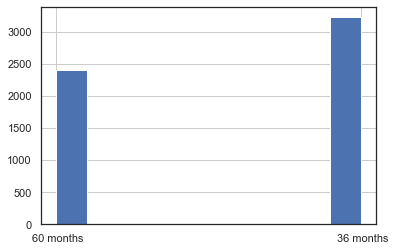

In [929]:
#sns.distplot(categorical_data.term)
categorical_data['term'].hist()

<b>The Loan with intrest rate between` 10 % `to `15 % `tend to be Charged Off more</b> 

In [930]:
categorical_data['int_rate'] = categorical_data['int_rate'].str.strip('%')
categorical_data['int_rate'] = categorical_data['int_rate'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


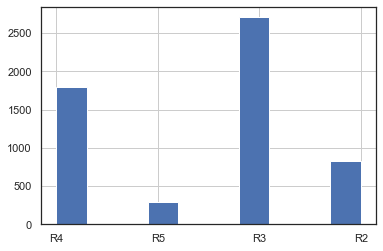

In [931]:
bins = [0,5,10,15,20,25]
name_bin = ['R1','R2','R3','R4','R5'] # R1 (0 to 5) R2 (5 to 10) R3 (10 to 15) R4 (15 to 20) R5 (20 to 25)

pd.cut(categorical_data['int_rate'], bins ,labels = name_bin ).hist()

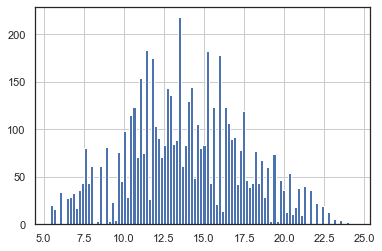

In [932]:
categorical_data['int_rate'].hist(bins=100)

<b>The Loan of grade B tend to be Charged Off more</b> 

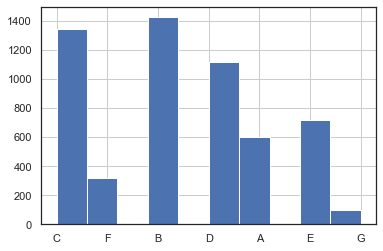

In [936]:
categorical_data['grade'].hist()
#categorical_data.grade.unique()

<b>The Loan of sub grade B5 tend to be Charged Off More</b> 

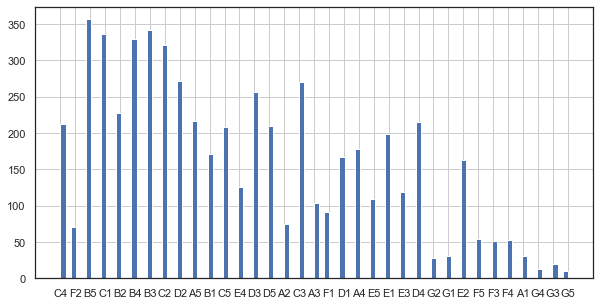

In [947]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
categorical_data['sub_grade'].hist(bins =100, ax = ax)

<b>The Loan taken for the purpose of `debt_consolidation` tend to be Charged Off More</b> 

In [963]:
categorical_data.purpose.unique()

array(['car', 'small_business', 'other', 'debt_consolidation',
       'major_purchase', 'credit_card', 'home_improvement', 'moving',
       'vacation', 'house', 'medical', 'wedding', 'renewable_energy',
       'educational'], dtype=object)

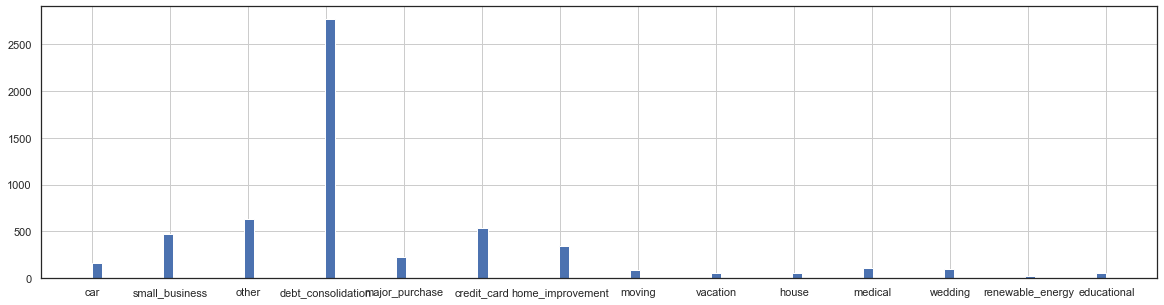

In [964]:
fig = plt.figure(figsize = (20,5))
ax = fig.gca()
categorical_data['purpose'].hist(bins =100, ax = ax)

### Analysis on categorical Customer Attributes on Charged off data

In [974]:
categorical_data.emp_length.unique()

array(['< 1 year', '4 years', '3 years', '10+ years', '1 year', '9 years',
       '2 years', '8 years', '7 years', '5 years', nan, '6 years'],
      dtype=object)

In [981]:
categorical_data['emp_length'] = categorical_data.emp_length.str.strip(' years')
categorical_data['emp_length'] =categorical_data.emp_length.str.strip('< ')
categorical_data['emp_length'] =categorical_data.emp_length.str.strip('+')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [984]:
categorical_data['emp_length'].dropna(inplace = True)

In [987]:
categorical_data['emp_length'] = categorical_data['emp_length'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<b>The Customers with Employemnet less than 2 years tend to be Charged Off More</b> 

In [988]:
categorical_data['emp_length'].unique()

array([ 1.,  4.,  3., 10.,  9.,  2.,  8.,  7.,  5., nan,  6.])

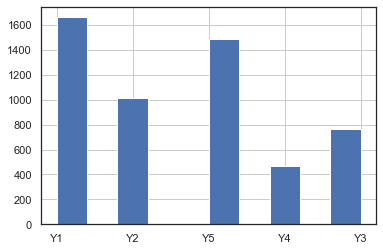

In [989]:
bins = [0,2,4,6,8,10]
name_bin = ['Y1','Y2','Y3','Y4','Y5'] #Y1 = 0 to 2 ,Y2 = 2 to 4,Y3 = 4 to 6,Y4 = 6 to 8,Y5= 8 to 10
pd.cut(categorical_data['emp_length'], bins ,labels = name_bin ).hist()

<b>The Customers with RENTed home tend to be Charged Off More</b> 

In [991]:
categorical_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

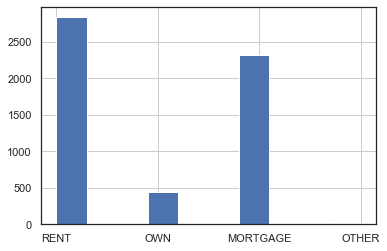

In [992]:
categorical_data['home_ownership'].hist()

<b>The Customers with `Not Verified` tend to be Charged Off More</b> 

In [994]:
categorical_data.verification_status.unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

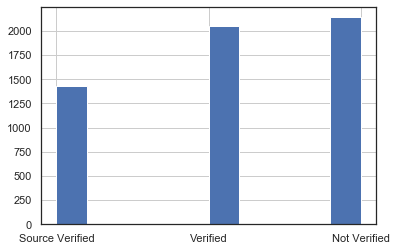

In [995]:
categorical_data['verification_status'].hist()

<b>The Loan issued on date `Dec-11` tend to be Charged Off More</b> 

In [1001]:
categorical_data.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07'], dtype=object)

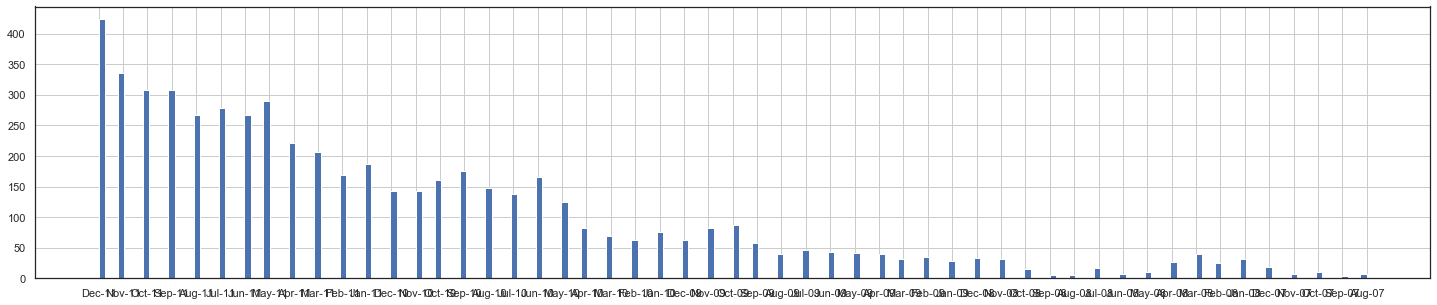

In [1000]:
fig = plt.figure(figsize = (25,5))
ax = fig.gca()
categorical_data['issue_d'].hist(bins =200, ax = ax)

<b>The Customers from `California CA` tend to be Charged Off More</b> 

In [1012]:
categorical_data.addr_state.unique()

array(['GA', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'OH', 'IL', 'WA', 'MN',
       'AK', 'OR', 'AZ', 'WI', 'NC', 'CO', 'MO', 'WV', 'NV', 'SC', 'RI',
       'MA', 'KY', 'HI', 'NJ', 'MT', 'MI', 'SD', 'DC', 'OK', 'VT', 'NM',
       'MD', 'AL', 'KS', 'UT', 'LA', 'AR', 'CT', 'NH', 'DE', 'WY', 'MS',
       'TN', 'ID', 'NE'], dtype=object)

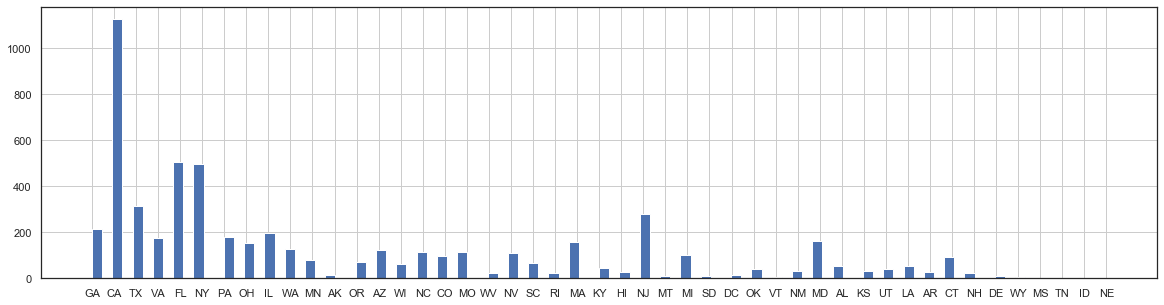

In [1015]:
fig = plt.figure(figsize = (20,5))
ax = fig.gca()
categorical_data['addr_state'].hist(bins =100, ax = ax)

- <b> The column `emp_title` is text data cleaning of text data is out of scope of this EDA Assignmnet, so leaving the column</b>
- <b>`zip_code`,`addr_state` are more or less showing same states, so only using `addr_state`.</b>
- <b> `last_credit_pull_d` are more correleted to the `Inquiry` column in numerical data so not using it here. </b>

## Charged OFF Data Analysis Conclusion 

- <b>The `total payed amount` is less when `DTI` is high, ie customer with `high DTI` tend to pay back less amount</b>
- <b>The `total payed amount` is `less when inquiry on credit score` is high, ie customer with high inquiry on credit score tend to pay back less amount ie credit loss will be high.</b>
- <b>The `total amount payed` by customer with `high credit line` and having high credit line present tend to pay back less amount,ie credit loss will be high.</b>
- <b>The `total amount payed` by customer with known `derogatory public records` tend to payback less amount ie credit loss will be high.</b>
- <b>The `total amount payed` by customer with `high revolving balance` tend to payback less amount ie credit loss will be high.</b>
- <b> The Loan with less number of `trems` tend to be Charged Off.</b>
- <b>The Loan with intrest rate between`10 %`to `15 %`tend to be Charged Off more.</b>
- <b>The Loan of `grade B` tend to be Charged Off more.</b>
- <b> The Loan of sub `grade B5` tend to be Charged Off More.</b>
- <b>The Loan taken for the purpose of `debt_consolidation` tend to be Charged Off More.</b>
- <b>The Customers with Employemnet `less than 2 years` tend to be Charged Off More.</b>
- <b>The Customers with `RENTed` home tend to be Charged Off More.</b>
- <b>The Customers with `Not Verified` tend to be Charged Off More.</b>
